<a href="https://colab.research.google.com/github/tyra0509/jejumaster/blob/main/%EA%B3%BC%EC%A0%9C1_%EC%9D%B4%EB%AA%85%EC%88%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 000데이터를 이용한 탐색적 데이터 분석

## 2021년 한 해 동안 식중독이 가장 많이 발생한 지역과 가장 많이 발생한 달은?

국가통계포털 https://kosis.kr/index/index.do


---

(코랩)한글 폰트 지정하기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

### #라이브러리 설치 확인하기


In [2]:
import pandas  as pd
import numpy as np
import matplotlib as plt
print(pd.__version__)
print(np.__version__)
print(plt.__version__)

1.5.3
1.23.5
3.7.1


---

### 1.데이터 다운로드하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


In [66]:
PATH = './sample_data/'
FILE = '시도별__월별_식중독환자_현황.csv'

---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [67]:
import pandas as pd

file = PATH+FILE
print(file)
df = pd.read_csv(file, encoding='utf-8')

print(type(df))
df.head()

./sample_data/시도별__월별_식중독환자_현황.csv
<class 'pandas.core.frame.DataFrame'>


,시도별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
0,시도별(1),총계,1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,시도별(1),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),...,환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명)
2,합계,11504,125,194,816,444,853,732,630,1536,...,401,417,194,343,1293,878,335,222,142,345
3,서울특별시,2142,11,95,466,55,291,54,68,172,...,62,178,10,58,8,154,-,-,20,53
4,부산광역시,637,-,3,18,52,26,68,193,224,...,51,29,43,46,595,91,22,7,6,5


---

### 2.데이터 전처리(가공하기)
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

#### # 데이터 요약

In [68]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시도별(1)   21 non-null     object
 1   2018     21 non-null     object
 2   2018.1   21 non-null     object
 3   2018.2   21 non-null     object
 4   2018.3   21 non-null     object
 5   2018.4   21 non-null     object
 6   2018.5   21 non-null     object
 7   2018.6   21 non-null     object
 8   2018.7   21 non-null     object
 9   2018.8   21 non-null     object
 10  2018.9   21 non-null     object
 11  2018.10  21 non-null     object
 12  2018.11  21 non-null     object
 13  2018.12  21 non-null     object
 14  2019     21 non-null     object
 15  2019.1   21 non-null     object
 16  2019.2   21 non-null     object
 17  2019.3   21 non-null     object
 18  2019.4   21 non-null     object
 19  2019.5   21 non-null     object
 20  2019.6   21 non-null     object
 21  2019.7   21 non-null     object
 22  2019

#### # 기술통계 정보

In [69]:
df.describe() #기술통계함수:평균, 최고최저값 등 가지고 있는 통계함수.
            #숫자데이터만 통계를 내준다.


,시도별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
count,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
unique,20,21,12,12,15,17,16,16,16,15,...,15,14,14,16,15,15,13,10,13,14
top,시도별(1),총계,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
freq,2,1,10,9,6,5,4,6,6,7,...,6,7,7,5,6,5,8,12,9,7


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공
널데이터. 측정 안 된 데이터가 있는 데이터

In [70]:
!pip install missingno

- **행에 결측 데이터 시각화**

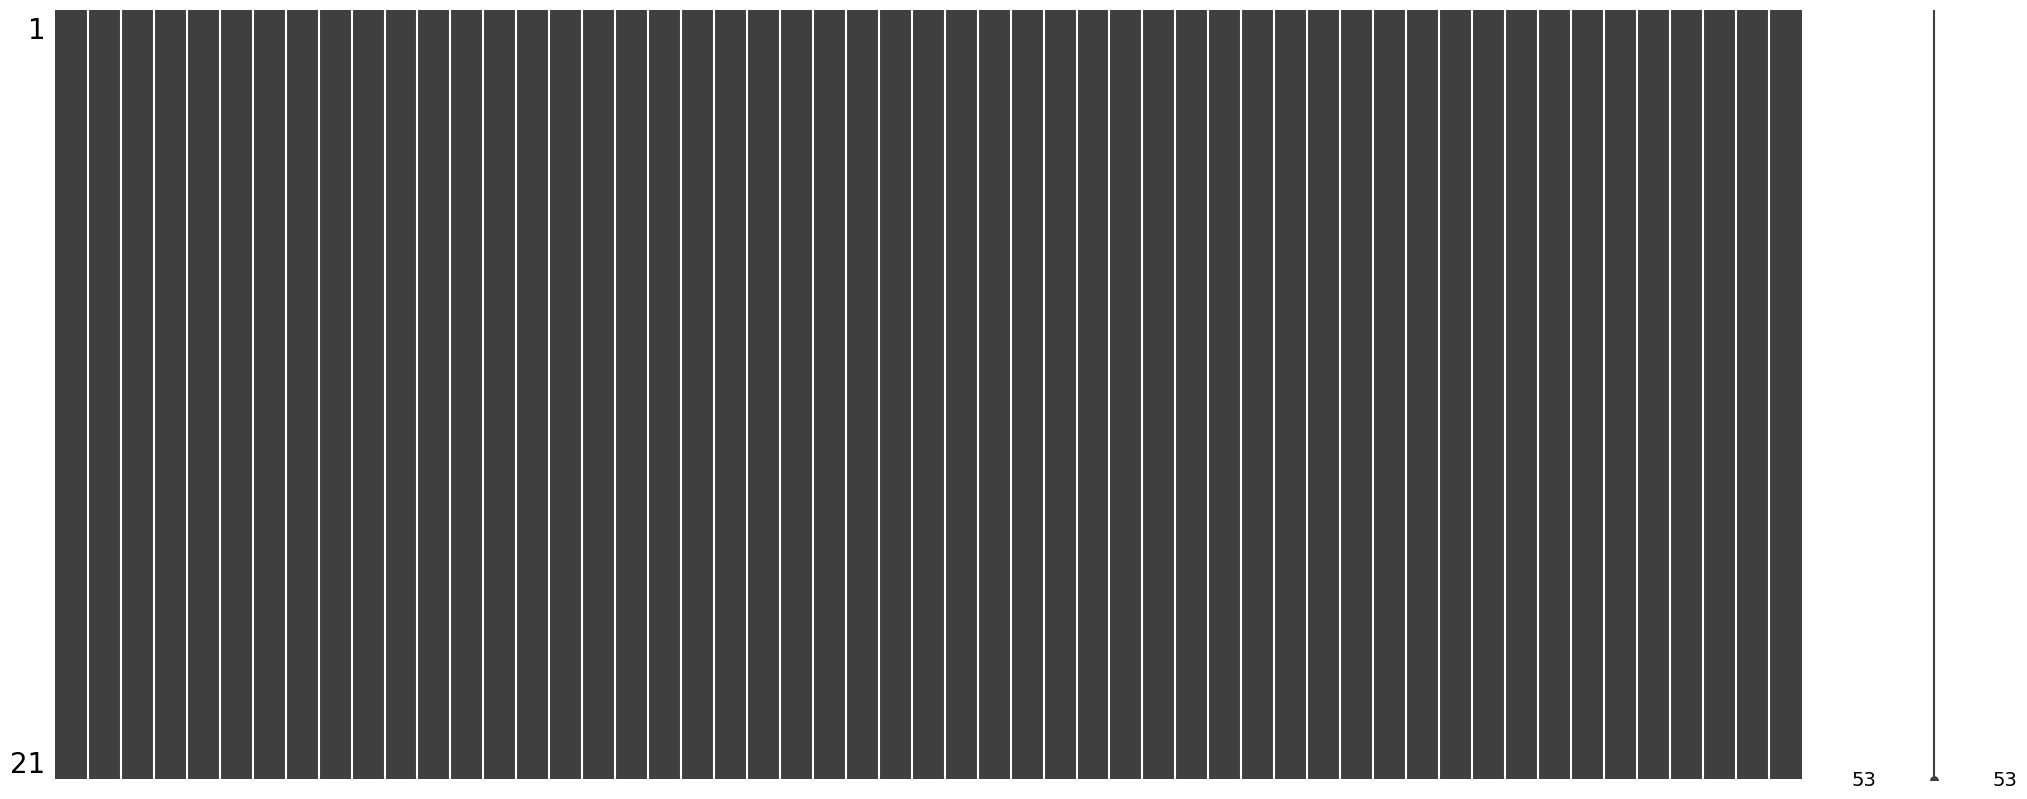

In [71]:
import missingno as msno
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트

msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


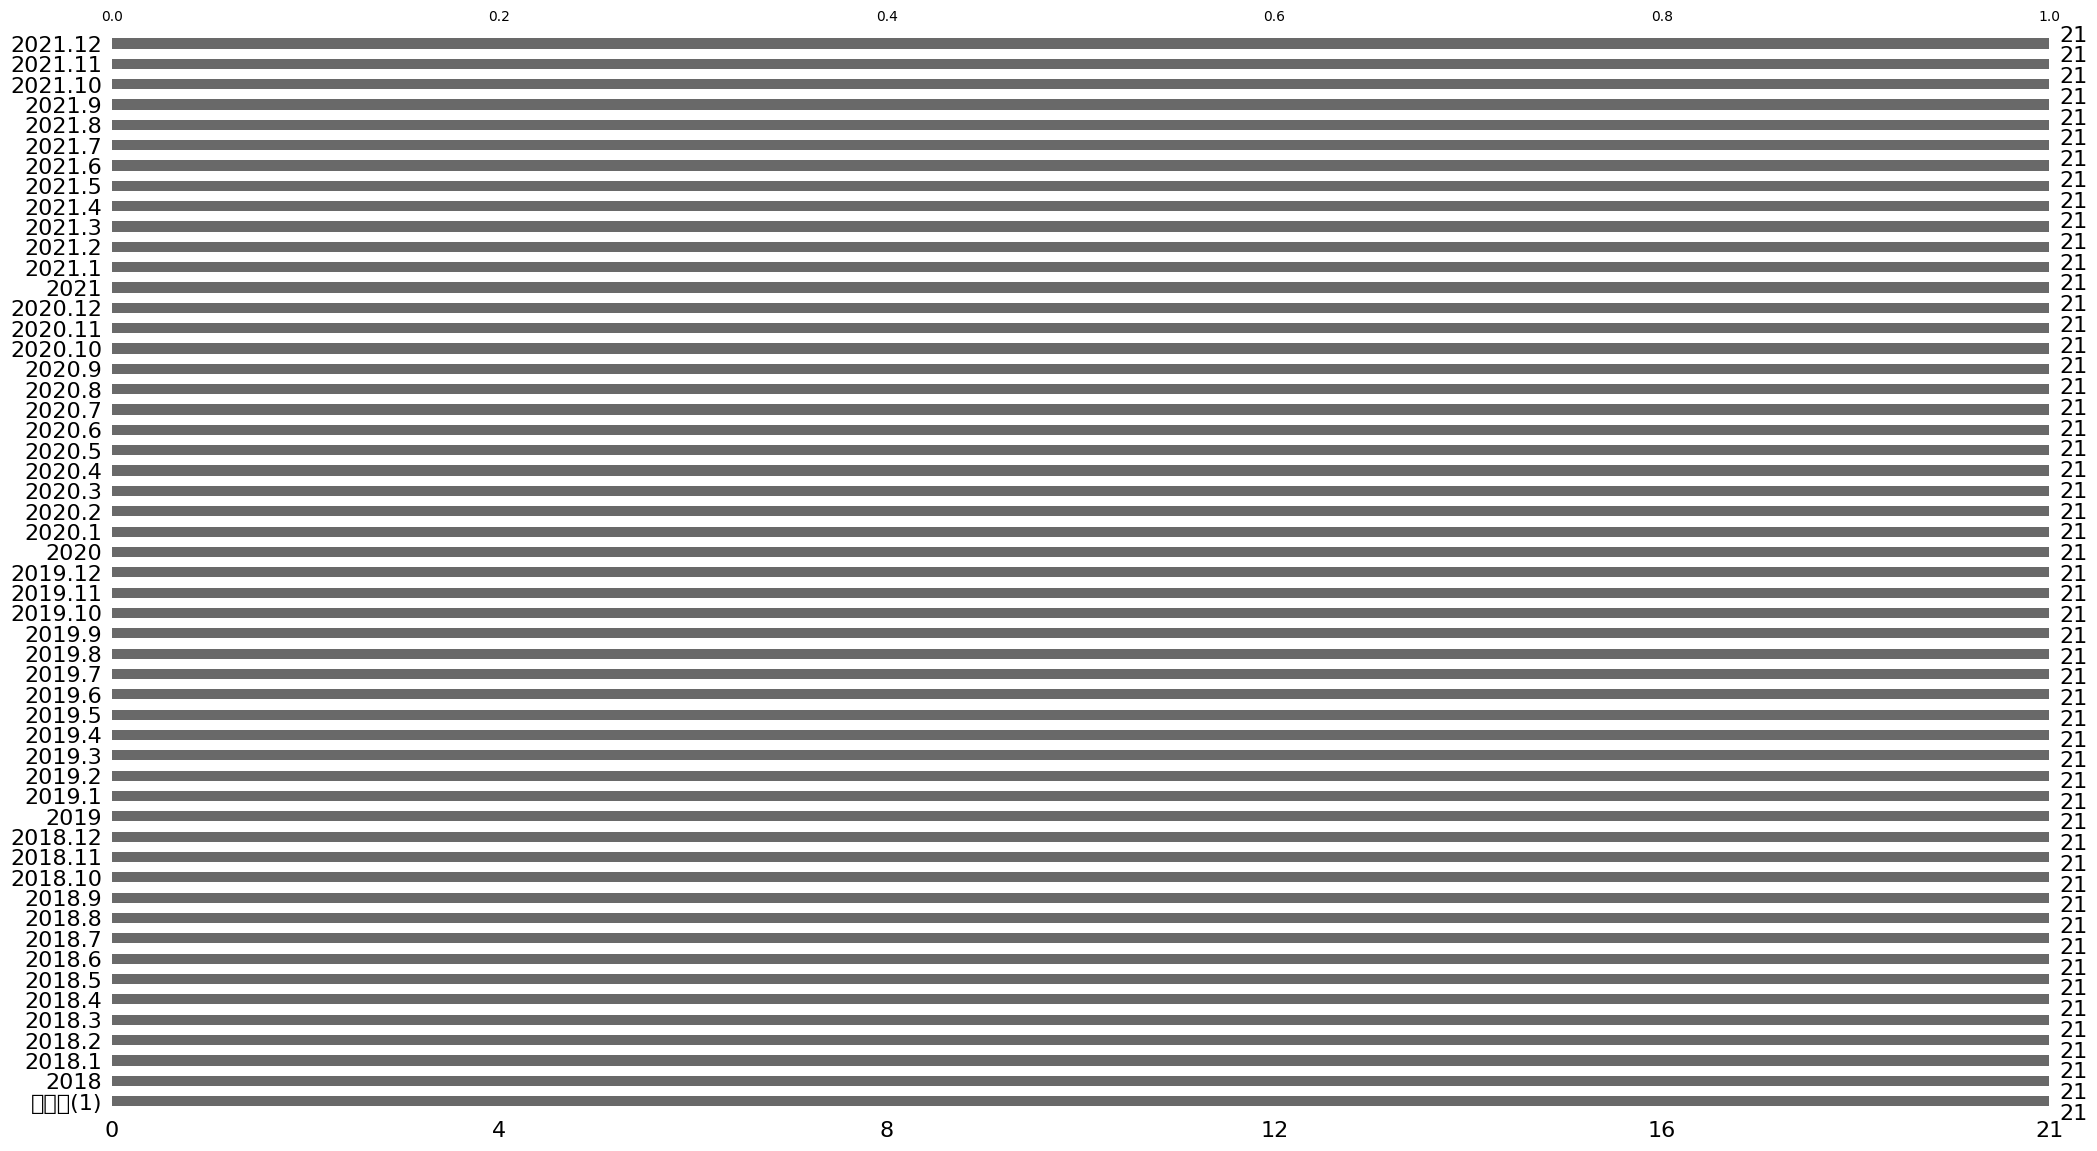

In [72]:
msno.bar(df)
plt.show()

---

#### 2. 컬럼명 변경하기

In [76]:
df.columns #현재 컬럼 프린트해보고 컬럼명 변경
df.columns = ['시도별', '2018 총 환자수', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5',
       '2018.6', '2018.7', '2018.8', '2018.9', '2018.10', '2018.11', '2018.12',
       '2019 총 환자수', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5', '2019.6',
       '2019.7', '2019.8', '2019.9', '2019.10', '2019.11', '2019.12', '2020 총 환자수',
       '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6', '2020.7',
       '2020.8', '2020.9', '2020.10', '2020.11', '2020.12', '2021 총 환자수', '2021.1',
       '2021.2', '2021.3', '2021.4', '2021.5', '2021.6', '2021.7', '2021.8',
       '2021.9', '2021.10', '2021.11', '2021.12'
       ]
df.head()

,시도별,2018 총 환자수,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
0,시도별(1),총계,1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,시도별(1),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),...,환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명),환자수 (명)
2,합계,11504,125,194,816,444,853,732,630,1536,...,401,417,194,343,1293,878,335,222,142,345
3,서울특별시,2142,11,95,466,55,291,54,68,172,...,62,178,10,58,8,154,-,-,20,53
4,부산광역시,637,-,3,18,52,26,68,193,224,...,51,29,43,46,595,91,22,7,6,5


#### 4. 컬럼 삭제

In [78]:
df.drop('2018 총 환자수', axis=1, inplace=True) #행=0, 열=1
df.drop('2019 총 환자수', axis=1, inplace=True)
df.drop('2020 총 환자수', axis=1, inplace=True)
df.drop('2021 총 환자수', axis=1, inplace=True)
df.drop([0], axis=0, inplace=True)
df.drop([1], axis=0, inplace=True)
df.drop([2], axis=0, inplace=True)

In [79]:
df.head(4)

,시도별,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
3,서울특별시,11,95,466,55,291,54,68,172,770,...,62,178,10,58,8,154,-,-,20,53
4,부산광역시,-,3,18,52,26,68,193,224,34,...,51,29,43,46,595,91,22,7,6,5
5,대구광역시,-,4,-,3,-,157,69,-,10,...,-,79,15,63,33,29,-,-,-,-
6,인천광역시,15,6,3,2,5,43,67,32,105,...,-,25,-,15,-,-,29,-,14,16


#### 5. 특정 조건 검색

In [80]:
print( '#시도별 개수: ', len( set(df['시도별']) ) )
print( '#시도별: ', set( df['시도별'] ) )

#시도별 개수:  18
#시도별:  {'충청북도', '충청남도', '경기도', '광주광역시', '전라북도', '울산광역시', '세종특별자치시', '제주특별자치도', '전라남도', '경상북도', '대전광역시', '강원특별자치도', '서울특별시', '불명', '부산광역시', '대구광역시', '경상남도', '인천광역시'}


In [86]:
df_2023 = df.query(" 시도별 == '서울특별시' ")
df_2023.head()

,시도별,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
3,서울특별시,11,95,466,55,291,54,68,172,770,...,62,178,10,58,8,154,-,-,20,53


- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [88]:
df[df.시도별 == '제주특별자치도' ]

,시도별,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
19,제주특별자치도,33,-,-,39,4,-,-,-,31,...,17,6,6,-,2,3,19,-,-,-


### [실습문제] 기상관측 데이터에서 특징 데이터 찾기
- 기상관측 지점이 제주인 데이터
- 가장 더웠던 년도, 월, 기온은?
- 가장 웠던 년도, 월, 기온은?

In [ ]:
# 포함(in) 사용
df.query(" 지점명 in ('제주특별자치도','서울특별시','부산광역시') ")

- **min()** : 최초 측정월, 마지막 측정월

In [ ]:
# 측정월 최소, 최대
print ( '최초 측정일시: ', min(df['일시']) )
print ( '최초 측정일시: ', df['일시'].min() )
print ( '최근 측정일시: ', max(df['일시']) )
print ( '최근 측정일시: ', df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
df['일시'].min()
df.query(" 일시 == '1904-04-01'")

df.query(f" 일시 == '{ df['일시'].min() }' ") #최초측정일

df[ df['일시'] == df['일시'].min() ]

최초 측정일시:  1904-04
최초 측정일시:  1904-04
최근 측정일시:  2023-10
최근 측정일시:  2023-10


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6633,112,인천,1904-04,1904,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
22495,159,부산,1904-04,1904,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN
24692,165,목포,1904-04,1904,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN


- **max()** : 최근 측정 월 검색

In [ ]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

In [ ]:
df.query(f" 지점명 == '제주' & 일시 == '{ df['일시'].max() }' ")

In [ ]:
df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].max() }' ")

In [ ]:
#제주에서 처음 기상 측정한 연월은?
df_jeju = df.query(" 지점명 in ('제주','성산','고산','성산포','서귀포') ")
print(f"제주에서 최초 측정일: {df_jeju['일시'].min()}")

# 제주에서 처음 기상 측정한 데이터 목록
df_jeju.query(f" 일시 == '{ df_jeju['일시'].min() }' ")

제주에서 최초 측정일: 1923-05


,지점,지점명,일시,검색일자,신규,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
28696,184,제주,1923-05,192305,184,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN


### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [ ]:
# 컬럼 추출
df['최고기온'].max()
df.최고기온.max()


# 행 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
35868,212,홍천,2018-08,2018,27.2,41.0,15.8,991.7,73.0,300.6,1.4,234.4,NaN


In [ ]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

기상관측 데이터를 통해 가장 더웠던 년도는?


AttributeError: ignored

In [ ]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

### [실습]: 가장 추웠던 날짜와 온도는?

In [ ]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()

###  [실습] : '제주'에서 가장 더웠던 날짜와 기온?

In [ ]:
wmax = df.query(" 지점명 == '제주' ")['최고기온'].max()
print(wmax)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최고기온 >= { wmax }")


wmax = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최고기온 >= { wmax }")

In [ ]:
# 서울에서 가장 더웠던 년도와 기온
wmax = df.query(" 지점명 in ('관악산','서울') ")['최고기온'].max()
df.query(f" 지점명 in ('관악산','서울') and 최고기온 >= { wmax }")

###  [실습] : '제주'에서 가장 추웠던 날짜와 기온은?

In [ ]:
wmin = df.query(" 지점명 == '제주' ")['최저기온'].min()
print(wmin)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최저기온 <= { wmin  } ")

wmin = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최저기온 <= { wmin  } ")

In [ ]:
# 서울에서 가장 추웠던 년도와 기온
wmin = df.query(" 지점명 in ('관악산','서울') ")['최저기온'].min()
df.query(f" 지점명 in ('관악산','서울') and 최저기온 <= { wmin  } ")

--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [52]:
df.groupby([''], as_index=False).mean()
df.groupby('서울특별시').mean()

KeyError: ignored

In [ ]:
df.groupby(['지점명'], as_index=False).count()

,지점명,지점,일시,검색일자,신규,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,강릉,1335,1335,1335,1335,1331,1335,1335,1153,1332,1333,1332,1325,293
1,강진군,168,168,168,168,166,168,168,166,166,168,167,168,14
2,강화,631,631,631,631,610,619,619,610,610,631,610,608,145
3,거제,619,619,619,619,610,618,618,610,610,607,610,608,44
4,거창,620,620,620,620,610,619,619,591,610,615,610,608,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,합천,613,613,613,613,610,610,610,609,610,608,609,608,91
99,해남,628,628,628,628,610,626,626,610,610,617,609,608,131
100,홍성,96,96,96,96,96,96,96,96,96,96,96,96,19
101,홍천,628,628,628,628,610,618,618,610,610,628,609,608,157


#### #그룹핑(컬럼1개): 지점별  평균기온

In [ ]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

KeyError: ignored

In [ ]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

In [ ]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

In [ ]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

In [ ]:
df_temp = df.groupby('지점명').aggregate({'평균기온':'mean'})
df_temp.plot()

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [ ]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

In [ ]:
df_temp = df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df_temp.plot()

### [실습문제] : 지점별 최고기온?

In [ ]:
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})

df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})
df.groupby('지점명').aggregate({'최고기온':'max'})

KeyError: ignored

- 인텍스를 초기화 하는 방법

In [ ]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

### [실습문제] : 지점별 년도별 최다 월합강수량?

In [ ]:
df.groupby(['지점명','년도'])['월합강수량'].agg(**{'최다월합강수량':'max'})
df.groupby(['지점명','년도']).aggregate({'월합강수량':'max'})

### [실습문제]  제주 전역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

In [ ]:
df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'최고기온':'max',
                                          '최저기온':'min',
                                          '월합강수량':'max',
                                          '최심적설':'max'})

df2.to_csv(PATH+'제주-년도별-날씨정보.csv', encoding='utf-8')
df2

KeyError: ignored

#### # DataFrame에서 한 행씩 불러오기
!!![주의]!!! 데이터가 많을 경우 실행하지 않도록

In [ ]:
# 한 행씩 불러오기  ---->
# for i, row in df_t.iterrows():
#     print(i, row)
#     print(i, row['지점명'], row['최고기온'])

#### 6.가공된 파일 신규 저장하기

In [ ]:
# 가공된 데이터 신규 파일로 저장하기
file = PATH+'weather_data2.csv'
df.to_csv(file, encoding='cp949', mode='w', index=True)

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = PATH+FILE
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.지점별 평균 구하기(지점 30개만 추출)
df_ = df.groupby('지점명').aggregate({'평균기온':'mean'}).head(30)

plt.plot(df_, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = PATH+'weather_data2.csv'
df = pd.read_csv(file, encoding='CP949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 년도별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

In [ ]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


In [ ]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

In [ ]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

In [ ]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

plt.savefig('./graph.png')

plt.show()

-------

---------

끝!